# 1. Importation & Lecture

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

chemin_de_dossier = './Donnees'
all_data = pd.DataFrame()
for fichier in os.listdir(chemin_de_dossier):
    if fichier.endswith('.csv'):
        chemin_de_fichier = os.path.join(chemin_de_dossier, fichier)
        data = pd.read_csv(chemin_de_fichier)
        all_data = pd.concat([all_data, data], ignore_index=True)

print(all_data.head())

chemin_fichier_final = './analyse_marche_financier.csv'
all_data.to_csv(chemin_fichier_final, index=False)

   Ticker        Date          Open          High           Low         Close  \
0    ^NYA  2008-08-01   8438.709961   8452.009766   8356.429688   8379.150391   
1   ^IXIC  2008-08-01   2326.830078   2328.949951   2286.409912   2310.959961   
2   ^FTSE  2008-08-01   5411.899902   5411.899902   5321.299805   5354.700195   
3   ^NSEI  2008-08-01   4331.600098   4422.950195   4235.700195   4413.549805   
4  ^BSESN  2008-08-01  14064.259766  14682.330078  14032.870117  14656.690430   

      Adj Close        Volume  
0   8379.150391  4.684870e+09  
1   2310.959961  2.312140e+09  
2   5354.700195  1.341947e+09  
3   4413.549805  0.000000e+00  
4  14656.690430  4.020000e+04  


# 2. Nettoyage & Filtrage

In [ ]:
# Vérifier les valeurs manquantes et les types de données avec .info()
print("Valeurs manquantes avant nettoyage :\n", all_data.isnull().sum())

# Supprimer les lignes contenant des valeurs manquantes
cleaned_data = all_data.dropna()

print("Valeurs manquantes après nettoyage :\n", cleaned_data.isnull().sum())

print("\nInformation sur le DataFrame nettoyé :")
print(cleaned_data.info())

# Vérification des doublons
duplicated_rows = cleaned_data.duplicated().sum()
print(f"Nombre de doublons : {duplicated_rows}")
cleaned_data = cleaned_data.drop_duplicates()

# Convertir la colonne Date en format datetime
cleaned_data['Date']=pd.to_datetime(cleaned_data['Date'])

# Filtrer les données pour une entreprise spécifique (Ticker)
entreprise = '^FTSE'
entreprise_data = cleaned_data[cleaned_data['Ticker']==entreprise]

Valeurs manquantes avant nettoyage :
 Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Valeurs manquantes après nettoyage :
 Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Information sur le DataFrame nettoyé :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44900 entries, 0 to 44899
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     44900 non-null  object 
 1   Date       44900 non-null  object 
 2   Open       44900 non-null  float64
 3   High       44900 non-null  float64
 4   Low        44900 non-null  float64
 5   Close      44900 non-null  float64
 6   Adj Close  44900 non-null  float64
 7   Volume     44900 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.7+ MB
None
Nombre de doublons : 0


In [15]:
print(entreprise_data.head())

   Ticker       Date         Open         High          Low        Close  \
2   ^FTSE 2008-08-01  5411.899902  5411.899902  5321.299805  5354.700195   
14  ^FTSE 2008-08-04  5354.700195  5414.700195  5310.299805  5320.200195   
26  ^FTSE 2008-08-05  5320.200195  5454.500000  5299.700195  5454.500000   
38  ^FTSE 2008-08-06  5454.500000  5498.600098  5440.100098  5486.100098   
50  ^FTSE 2008-08-07  5486.100098  5539.299805  5450.899902  5477.500000   

      Adj Close        Volume  
2   5354.700195  1.341947e+09  
14  5320.200195  9.720983e+08  
26  5454.500000  1.655153e+09  
38  5486.100098  1.634412e+09  
50  5477.500000  1.552156e+09  


# 3. L’évolution du prix de clôture de l'indice ^FTSE au fil du temps

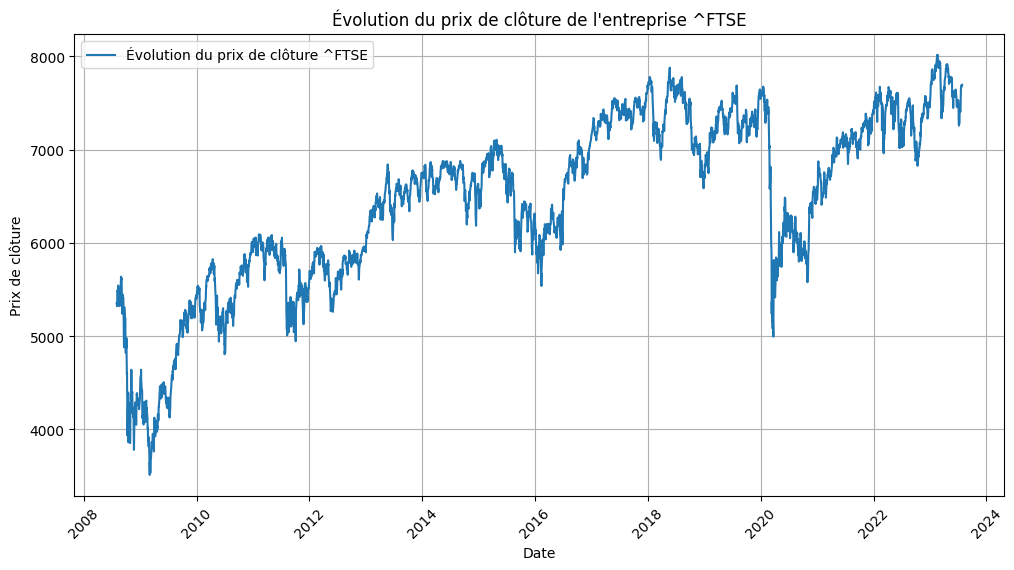

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=entreprise_data['Date'], y=entreprise_data['Close'], label=f"Évolution du prix de clôture {entreprise}")
plt.title(f"Évolution du prix de clôture de l'entreprise {entreprise}")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# 4. Evolution du volume d'échange de l'indice ^FTSE

C:\Users\Bury\AppData\Local\Temp\ipykernel_16976\1136182749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entreprise_data['Year'] = entreprise_data['Date'].dt.year


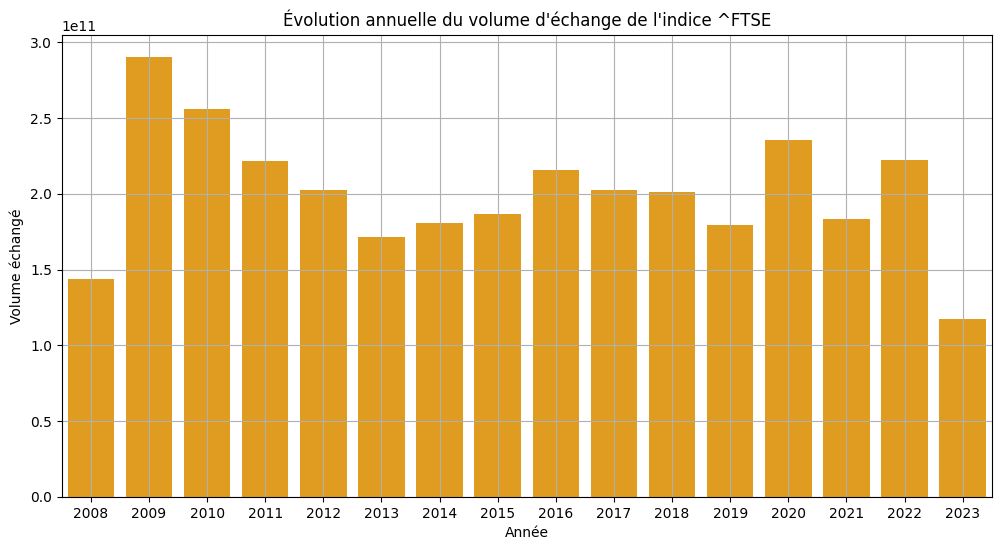

   Ticker       Date         Open         High          Low        Close  \
2   ^FTSE 2008-08-01  5411.899902  5411.899902  5321.299805  5354.700195   
14  ^FTSE 2008-08-04  5354.700195  5414.700195  5310.299805  5320.200195   
26  ^FTSE 2008-08-05  5320.200195  5454.500000  5299.700195  5454.500000   
38  ^FTSE 2008-08-06  5454.500000  5498.600098  5440.100098  5486.100098   
50  ^FTSE 2008-08-07  5486.100098  5539.299805  5450.899902  5477.500000   

      Adj Close        Volume  Year  
2   5354.700195  1.341947e+09  2008  
14  5320.200195  9.720983e+08  2008  
26  5454.500000  1.655153e+09  2008  
38  5486.100098  1.634412e+09  2008  
50  5477.500000  1.552156e+09  2008  


In [17]:
# Extraire l'année en créant un nouvelle colonne à partir de la colonne Date
entreprise_data['Year'] = entreprise_data['Date'].dt.year

# Mise à jour de la colonne Year par la somme des volumes par an

volume_annuel_echange_FTSE = entreprise_data.groupby('Year')['Volume'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Volume', data=volume_annuel_echange_FTSE, color='orange')
plt.title(f"Évolution annuelle du volume d'échange de l'indice {entreprise}")
plt.xlabel("Année")
plt.ylabel("Volume échangé")
plt.grid()
plt.show()

print(entreprise_data.head())

# 5. Evolution du prix de clôture des entreprises ^GSPC - ^NYA - ^FTSE

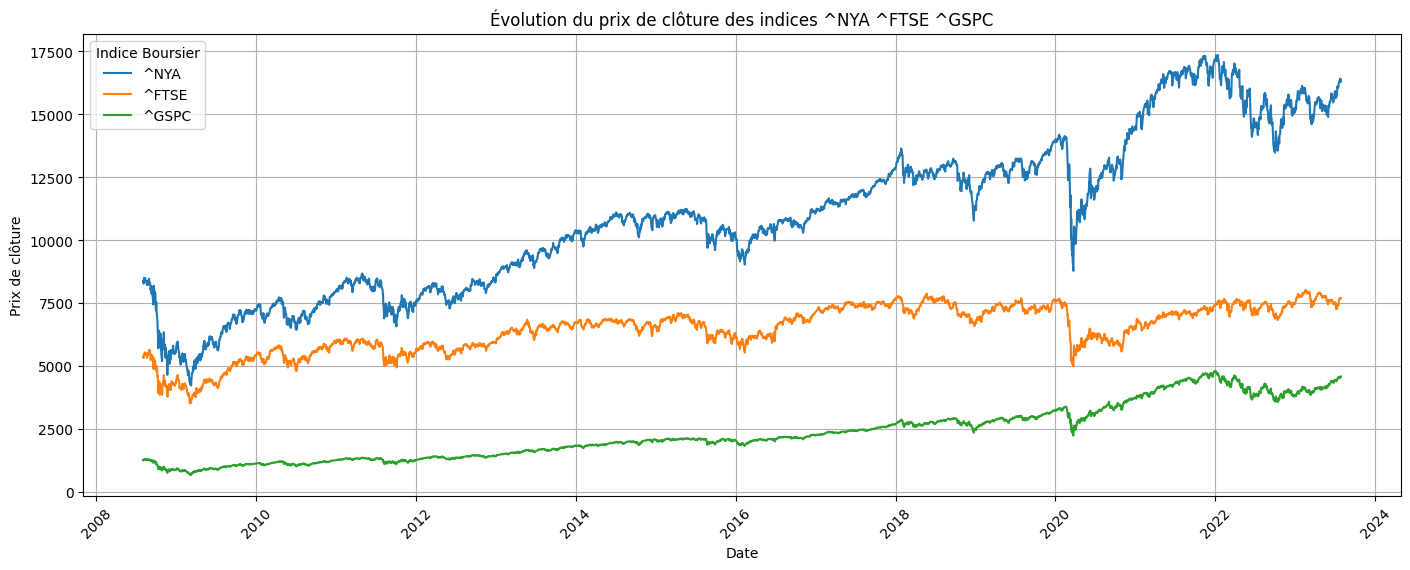

In [18]:
entreprises_pour_evol_prix_close = ['^GSPC' , '^NYA' , '^FTSE']
comparaison_prix_close = cleaned_data[cleaned_data['Ticker'].isin(entreprises_pour_evol_prix_close)]

plt.figure(figsize=(17, 6))
sns.lineplot(data=comparaison_prix_close, x="Date", y="Close", hue="Ticker", palette="tab10")
plt.title("Évolution du prix de clôture des indices ^NYA ^FTSE ^GSPC")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.xticks(rotation=45)
plt.legend(title="Indice Boursier")
plt.grid()
plt.show()

# 6. Variations en pourcentage des prix de clôture de l'indice ^FTSE

True
2          NaN
14   -0.006443
26    0.025243
38    0.005793
50   -0.001568
Name: Variation Close %, dtype: float64
Valeurs manquantes de variation :
 1


C:\Users\Bury\AppData\Local\Temp\ipykernel_16976\1648959638.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entreprise_data['Variation Close %'] = entreprise_data['Close'].pct_change()


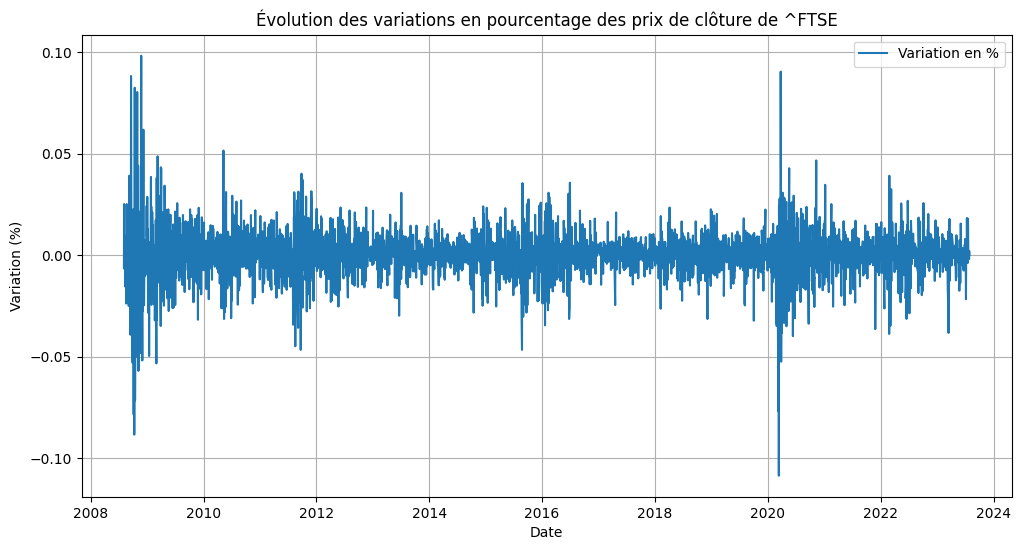

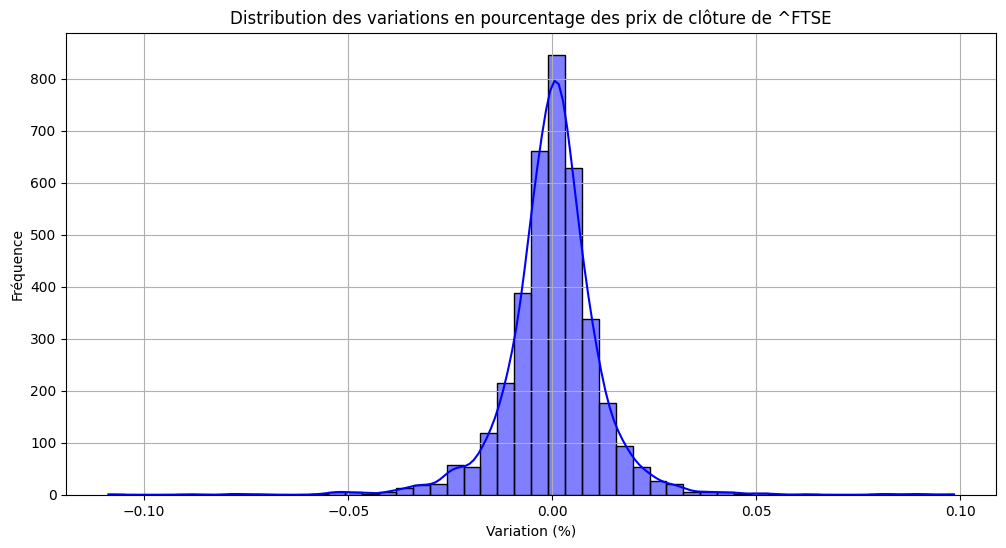

In [19]:
# Vérification si les données sont triées chronologiquement pour assurer le bon calclul de la variation
print(entreprise_data['Date'].is_monotonic_increasing)


# Création d'une nouvelle colonne pour calculer la variation du prix de clôture
entreprise_data['Variation Close %'] = entreprise_data['Close'].pct_change()
print(entreprise_data['Variation Close %'].head())


# Vérification des valeurs manquantes dans la nouvelle colonne, il doit en avoir qu'une seule, la première ligne
print("Valeurs manquantes de variation :\n", (entreprise_data['Variation Close %'].isna().sum()))


# Suppresion de la ligne manquante
entreprise_data = entreprise_data.dropna(subset=['Variation Close %'])

# Visualisation des variations de la colonne 'Variation Close %'
plt.figure(figsize=(12, 6))
sns.lineplot(x=entreprise_data['Date'], y=entreprise_data['Variation Close %'], label='Variation en %')
plt.title("Évolution des variations en pourcentage des prix de clôture de ^FTSE")
plt.xlabel("Date")
plt.ylabel("Variation (%)")
plt.grid()
plt.legend()
plt.show()

########################################################

# Visualisation de la fréquence variations de la colonne 'Variation Close %'

plt.figure(figsize=(12, 6))
sns.histplot(entreprise_data['Variation Close %'], bins=50, kde=True, color='blue', )
plt.title("Distribution des variations en pourcentage des prix de clôture de ^FTSE")
plt.xlabel("Variation (%)")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

# 7. Analyse de corrélation

C:\Users\Bury\AppData\Local\Temp\ipykernel_16976\2250178742.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_indices_correl['Variation Close %'] = selected_indices_correl.groupby('Ticker')['Close'].pct_change()


   Ticker       Date         Open         High          Low        Close  \
0    ^NYA 2008-08-01  8438.709961  8452.009766  8356.429688  8379.150391   
2   ^FTSE 2008-08-01  5411.899902  5411.899902  5321.299805  5354.700195   
9   ^GSPC 2008-08-01  1269.420044  1270.520020  1254.540039  1260.310059   
12   ^NYA 2008-08-04  8379.160156  8379.160156  8253.450195  8268.650391   
14  ^FTSE 2008-08-04  5354.700195  5414.700195  5310.299805  5320.200195   

      Adj Close        Volume  Variation Close %  
0   8379.150391  4.684870e+09                NaN  
2   5354.700195  1.341947e+09                NaN  
9   1260.310059  4.684870e+09                NaN  
12  8268.650391  4.562280e+09          -0.013187  
14  5320.200195  9.720983e+08          -0.006443  
Ticker         ^FTSE     ^GSPC      ^NYA
Date                                    
2008-08-01       NaN       NaN       NaN
2008-08-04 -0.006443 -0.008966 -0.013187
2008-08-05  0.025243  0.028719  0.024575
2008-08-06  0.005793  0.003354  

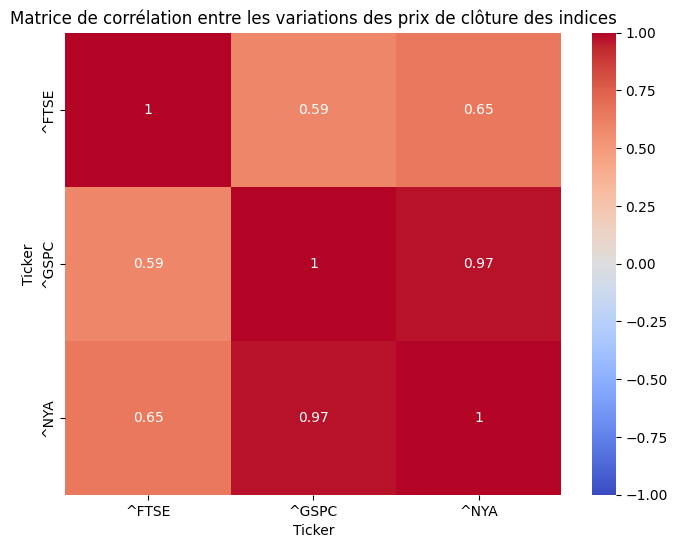

In [20]:
entreprises_pour_correl = ['^GSPC' , '^NYA' , '^FTSE']
selected_indices_correl = cleaned_data[cleaned_data['Ticker'].isin(entreprises_pour_correl)]

selected_indices_correl['Variation Close %'] = selected_indices_correl.groupby('Ticker')['Close'].pct_change()
print(selected_indices_correl.head())

# Reformer les données en une table pivot pour les corrélations
pivot_data = selected_indices_correl.pivot(index='Date', columns='Ticker', values='Variation Close %')

print(pivot_data.head())

correlation_matrix = pivot_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation entre les variations des prix de clôture des indices")
plt.show()

# 8. Identification & Visualisation des valeurs aberrantes

Nombre total de valeurs aberrantes 22
Les valeurs aberrantes représentent 0.58% des variations du prix clôture
Year
2008    16
2009     1
2010     1
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     4
2021     0
2022     0
2023     0
Name: Est aberrante, dtype: int64


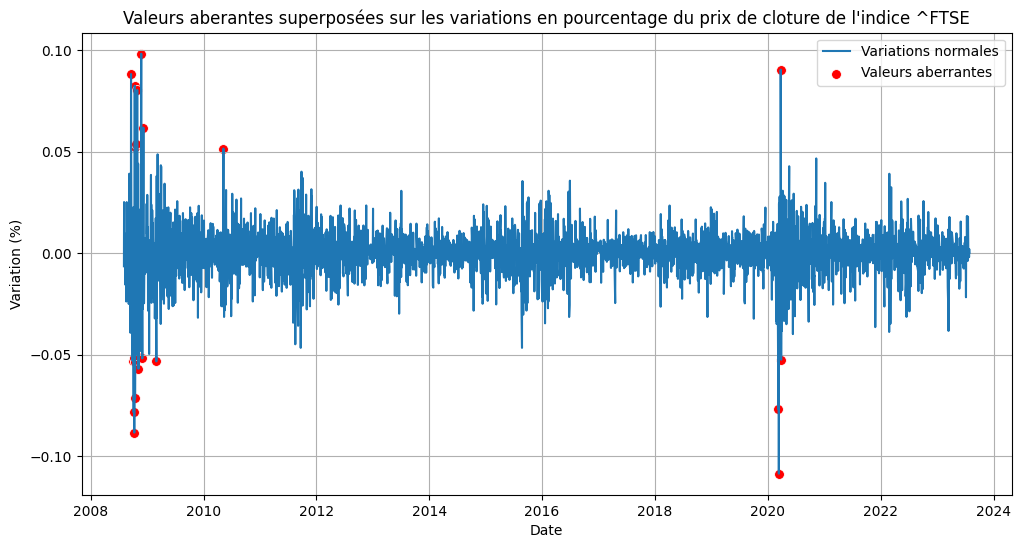

In [21]:
seuil = 0.05

entreprise_data['Est aberrante'] = entreprise_data['Variation Close %'].apply (lambda x:abs(x) > seuil)

# Calcul du total de nombre de valeurs aberrantes
total_aberrantes = entreprise_data['Est aberrante'].sum()
print(f"Nombre total de valeurs aberrantes {total_aberrantes}")

# Part des valeurs aberrantes parmis les évolutions totales du prix de clôture
prct_aberrantes = ((total_aberrantes/len(entreprise_data))*100).round(2)
print(f"Les valeurs aberrantes représentent {prct_aberrantes}% des variations du prix clôture")

# Repartition annuelle des valeurs aberrantes
aberration_annuelle = entreprise_data.groupby('Year')['Est aberrante'].sum()
print(aberration_annuelle)

# Visualisation des valeurs aberrantes
plt.figure(figsize=(12,6))
sns.lineplot(x='Date' , y='Variation Close %' , data=entreprise_data, label = "Variations normales")

sns.scatterplot(x='Date', y='Variation Close %', data=entreprise_data[entreprise_data['Est aberrante']] , color = 'red' , label = 'Valeurs aberrantes' , s=50)

plt.title("Valeurs aberantes superposées sur les variations en pourcentage du prix de cloture de l'indice ^FTSE")
plt.xlabel('Date')
plt.ylabel('Variation (%)')
plt.legend
plt.grid()
plt.show()
